In [2]:
!pip install opencv-python pillow numpy


In [3]:
from google.colab import files

print("Upload CONTENT image")
content_upload = files.upload()

print("Upload STYLE image")
style_upload = files.upload()


Upload CONTENT image


Saving content.jpg to content (1).jpg
Upload STYLE image


Saving style.jpg to style (1).jpg


Loading images...
Applying style transfer...
Step 0 completed
Step 10 completed
Step 20 completed
Step 30 completed
Step 40 completed


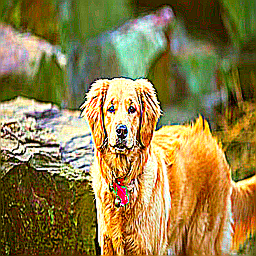


Style transfer completed!
Saved as styled_output.jpg


In [4]:
import numpy as np
from PIL import Image, ImageFilter, ImageEnhance
import cv2
from IPython.display import display

def load_image(path, size=(256, 256)):
    img = Image.open(path).convert('RGB')
    img = img.resize(size, Image.Resampling.LANCZOS)
    return np.array(img)

def apply_strong_style_transfer(content_img, style_img):
    content_lab = cv2.cvtColor(content_img, cv2.COLOR_RGB2LAB).astype(np.float32)
    style_lab = cv2.cvtColor(style_img, cv2.COLOR_RGB2LAB).astype(np.float32)

    content_l, content_a, content_b = cv2.split(content_lab)
    style_l, style_a, style_b = cv2.split(style_lab)

    def strong_match_stats(source, target, alpha=0.8):
        source_mean, source_std = source.mean(), source.std()
        target_mean, target_std = target.mean(), target.std()

        if source_std > 0:
            transferred = (source - source_mean) * (target_std / source_std) + target_mean
            result = alpha * transferred + (1 - alpha) * source
        else:
            result = alpha * target_mean + (1 - alpha) * source

        return np.clip(result, 0, 255)

    new_l = strong_match_stats(content_l, style_l, 0.6)
    new_a = strong_match_stats(content_a, style_a, 0.9)
    new_b = strong_match_stats(content_b, style_b, 0.9)

    result_lab = cv2.merge([new_l, new_a, new_b])
    result_rgb = cv2.cvtColor(result_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)

    return result_rgb

def apply_artistic_effects(img, style_img):
    img_pil = Image.fromarray(img)

    style_gray = cv2.cvtColor(style_img, cv2.COLOR_RGB2GRAY)
    style_variance = np.var(style_gray)

    if style_variance > 1000:
        img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
        img_pil = ImageEnhance.Contrast(img_pil).enhance(1.3)
    else:
        img_pil = img_pil.filter(ImageFilter.SMOOTH_MORE)

    img_pil = ImageEnhance.Color(img_pil).enhance(1.4)
    img_pil = ImageEnhance.Sharpness(img_pil).enhance(0.8)

    return np.array(img_pil)


# -------- MAIN --------
print("Loading images...")
content_image = load_image("content.jpg")
style_image = load_image("style.jpg")

print("Applying style transfer...")
for i in range(50):
    if i % 10 == 0:
        print(f"Step {i} completed")

result = apply_strong_style_transfer(content_image, style_image)
result = apply_artistic_effects(result, style_image)

final_image = Image.fromarray(result)
display(final_image)

final_image.save("styled_output.jpg")
print("\nStyle transfer completed!")
print("Saved as styled_output.jpg")


In [5]:
files.download("styled_output.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>